Goal: try learning/implementing at least one new ML algorithm every week
<br><br>
To-do list:

- Do some data cleaning
  - remove stop words
  - lemma
- implement support vector machine 
- or other (simple) ML algorithms
  - KNN
  - [Passive Aggressive Classification Algorithm](https://thecleverprogrammer.com/2021/02/10/passive-aggressive-classifier-in-machine-learning/)

<br><br>
Maybe
- Gradient decent with Pytorch
- [RNN](https://en.wikipedia.org/wiki/Recurrent_neural_network) with [Pytorch](https://pytorch.org/tutorials/)???!😳😳😳


Referance materials

- https://www.kaggle.com/naim99/your-first-nlp-competition-submission
- https://github.com/hirish99/sentiment-analysis-project
- [StatQuest~](https://www.youtube.com/channel/UCtYLUTtgS3k1Fg4y5tAhLbw)

###Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.treebank import TreebankWordDetokenizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [ ]:
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

##**Data Setup & Pre-processing**

In [ ]:
!gdown --id 143jlmEQqR_CFxiTPviRRLecI8Fjnuy39
!gdown --id 1urQCLkvaOSODgMzh0Fc-H2h2c1D6jS4y
!gdown --id 1gtmGhSALmKYL9AbRQ4st1EKTlZx7II_6

Downloading...
From: https://drive.google.com/uc?id=143jlmEQqR_CFxiTPviRRLecI8Fjnuy39
To: /content/sample_submission.csv
100% 22.7k/22.7k [00:00<00:00, 18.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1urQCLkvaOSODgMzh0Fc-H2h2c1D6jS4y
To: /content/test.csv
100% 421k/421k [00:00<00:00, 30.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1gtmGhSALmKYL9AbRQ4st1EKTlZx7II_6
To: /content/train.csv
100% 988k/988k [00:00<00:00, 35.9MB/s]


In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

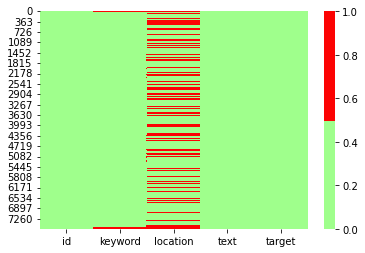

In [ ]:
# Visualizing missing data points
cols = train.columns[:]
colours = ['#9fff8c', '#fc0303'] # Red is missing. green is not missing.
sns.heatmap(train[cols].isnull(), cmap=sns.color_palette(colours))
# There's a bunch of missing data for location and a little bit for keyword

In [ ]:
# removing stop words (words that don't contain meaning. ex: a, the, umm)
# and lemmatize the words
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
train['filtered'] = train['text']

# function that takes a string, tokenize, removes stop words, and lemmatize the words
def text_process(txt):
  words = word_tokenize(txt)
  
  #filtered = [w for w in words if not w in stop_words]
  
  filtered = []
  for t in words:
    if t not in stop_words:
      word = lemmatizer.lemmatize(t)
      filtered.append(word)
  
  return filtered

# use the function to remove stop words & add a filtered column in the train dataframe
# also detokenize it for sklearn vectorizer
for t in range(len(train['text'])):
  train['filtered'].iloc[t] = TreebankWordDetokenizer().detokenize(text_process(train['text'].iloc[t]))

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
# check for the difference
train['text'].head()

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

In [ ]:
train['filtered'].head()

0     Our Deeds Reason #earthquake May ALLAH Forgive u
1              Forest fire near La Ronge Sask . Canada
2    All resident asked 'shelter place' notified of...
3    13,000 people receive #wildfire evacuation ord...
4    Just got sent photo Ruby #Alaska smoke #wildfi...
Name: filtered, dtype: object

In [ ]:
# train test split by 75:25 split

x = train['filtered']
y = train['target']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.25)

##**<font color='Cyan'>Naive Bayes</font>**

In [ ]:
# count vectorize texts for both the train set and validation set
cv = CountVectorizer()
x_cvec = cv.fit_transform(x_train).toarray()
xval_cvec = cv.transform(x_val).toarray()

tf = TfidfTransformer().fit(x_cvec)
x_vec = tf.transform(x_cvec)
xval_vec = tf.transform(xval_cvec)


# tfidf = MultinomialNB()

# use multinomial naive bayes - https://www.youtube.com/watch?v=O2L2Uv9pdDA&ab_channel=StatQuestwithJoshStarmer
mnb = MultinomialNB(alpha=1)
mnb.fit(x_vec, y_train)

# score
mnb.score(xval_vec, y_val)

0.8093487394957983

In [ ]:
# Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(x_vec, y_train)

# score
bnb.score(xval_vec, y_val)

0.7962184873949579

In [ ]:
# Gaussian Naive Bayes - https://www.youtube.com/watch?v=H3EjCKtlVog&ab_channel=StatQuestwithJoshStarmer
gnb = GaussianNB()
gnb.fit(x_cvec, y_train)

# score
gnb.score(xval_cvec, y_val)
# the score is pretty bad, so I guess the data isn't really normal

0.6150210084033614

##**<font color='cyan'>Support Vector Machine</font>**

In [ ]:
# countvectorized x = features (x)
# y_train = target

# clf = svm.SVC(kernel='linear').fit(x_vec, y_train)